**Project 2 - Healthcare**

DESCRIPTION

**Problem Statement** 

*   NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
*   The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
*   Build a model to accurately predict whether the patients in the dataset have diabetes or not.


Project Task: Week 1                                  
Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset.Create a count (frequency) plot describing the data types and the count of variables.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# read the CSV file
df = pd.read_csv('health care diabetes.csv')

In [ ]:
# here we have 768 observations(rows) and 9 variables(columns)
type(df)
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**NOTE :** 
Here Outcome is the Target Variable which holds only 1 and 0 

1 - Diabetic      
0 - Non Diabetic 

In [ ]:
# check all the variables/columns and their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# check NULL
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
# Descriptive Analysis
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# check 0 (here 0 indicates missing value)
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
# replace 0 with mean value only for the below columns :
# Glucose, BloodPressure, SkinThickness, Insulin, BMI
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

df.eq(0).any()
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
# Check count and create the histograms of the below variables:
# Glucose, BloodPressure, SkinThickness, Insulin, BMI
df['Glucose'].value_counts().head()

100.0    17
99.0     17
125.0    14
106.0    14
111.0    14
Name: Glucose, dtype: int64

(array([  4.,  19.,  87., 149., 166., 125.,  88.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <a list of 10 Patch objects>)

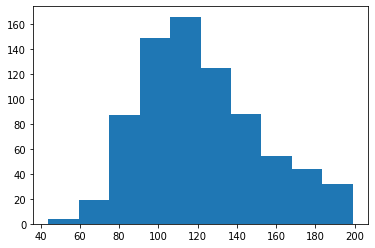

In [ ]:
plt.hist(df['Glucose'])

In [ ]:
df['BloodPressure'].value_counts().head()

70.0    57
74.0    52
68.0    45
78.0    45
72.0    44
Name: BloodPressure, dtype: int64

(array([  3.,   2.,  35., 118., 261., 214., 105.,  18.,  10.,   2.]),
 array([ 24. ,  33.8,  43.6,  53.4,  63.2,  73. ,  82.8,  92.6, 102.4,
        112.2, 122. ]),
 <a list of 10 Patch objects>)

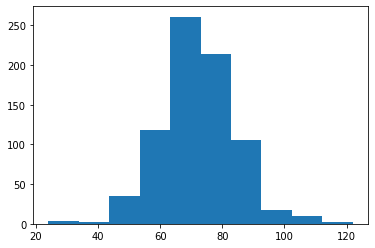

In [ ]:
plt.hist(df['BloodPressure'])

In [ ]:
df['SkinThickness'].value_counts().head()

20.536458    227
32.000000     31
30.000000     27
27.000000     23
23.000000     22
Name: SkinThickness, dtype: int64

(array([ 59., 368., 181., 118.,  36.,   4.,   1.,   0.,   0.,   1.]),
 array([ 7. , 16.2, 25.4, 34.6, 43.8, 53. , 62.2, 71.4, 80.6, 89.8, 99. ]),
 <a list of 10 Patch objects>)

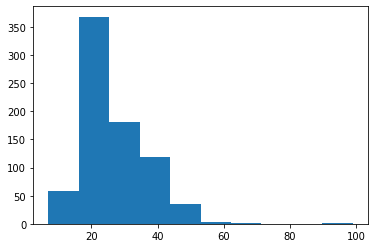

In [ ]:
plt.hist(df['SkinThickness'])

In [ ]:
df['Insulin'].value_counts().head()

79.799479     374
105.000000     11
130.000000      9
140.000000      9
120.000000      8
Name: Insulin, dtype: int64

(array([516., 143.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <a list of 10 Patch objects>)

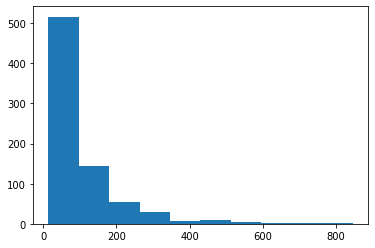

In [ ]:
plt.hist(df['Insulin'])

In [ ]:
df['BMI'].value_counts().head()

32.000000    13
31.600000    12
31.200000    12
31.992578    11
33.300000    10
Name: BMI, dtype: int64

(array([ 52., 161., 207., 193.,  91.,  48.,  10.,   4.,   1.,   1.]),
 array([18.2 , 23.09, 27.98, 32.87, 37.76, 42.65, 47.54, 52.43, 57.32,
        62.21, 67.1 ]),
 <a list of 10 Patch objects>)

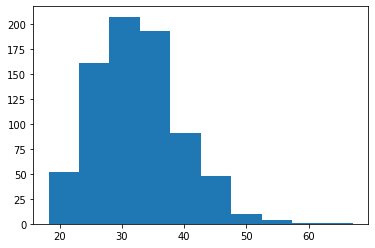

In [ ]:
plt.hist(df['BMI'])

In [ ]:
# get the skewness of the data
df.skew()

Pregnancies                 0.901674
Glucose                     0.533225
BloodPressure               0.173050
SkinThickness               1.226670
Insulin                     3.291825
BMI                         0.601103
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

Acceptable Skewness Range :

The standard which is followed is skewness between -1 and +1

As a general rule of thumb: 

*   If skewness is less than -1 or greater than 1, the distribution is highly skewed.

*   If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.


*  If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.


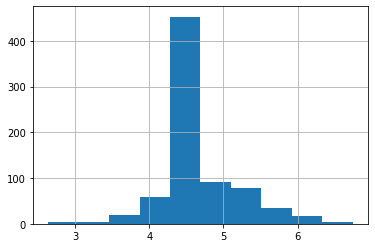

In [ ]:
# the above skewness output shows 
# Insulin is highly skewed
# SkinThickness is moderately skewed
# BMI is moderately skewed

# So A log transformation can help to fit a very skewed distribution into normal distribution
# Log Transformation of Insulin
df['Insulin'] = df['Insulin'].apply(np.log)
#df['Insulin'].apply(np.log).hist()
df['Insulin'].hist()

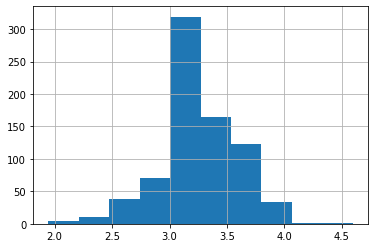

In [ ]:
# Log Transformation of SkinThickness
df['SkinThickness'] = df['SkinThickness'].apply(np.log)
#df['SkinThickness'].apply(np.log).hist()
df['SkinThickness'].hist()

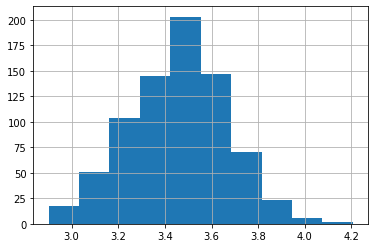

In [ ]:
# Log Transformation of BMI
df['BMI'] = df['BMI'].apply(np.log)
df['BMI'].hist()


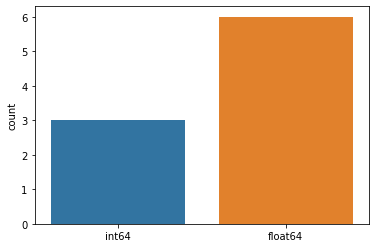

In [ ]:
# Create a count (frequency) plot describing the data types
# and the count of variables. 
df.dtypes
sns.countplot(df.dtypes.map(str))
#value_counts()
#df.dtypes.values

Project Task: Week 2                                   
Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

NOTE :

A pairs plot allows us to see both distribution of single variable and relationships between two variables.

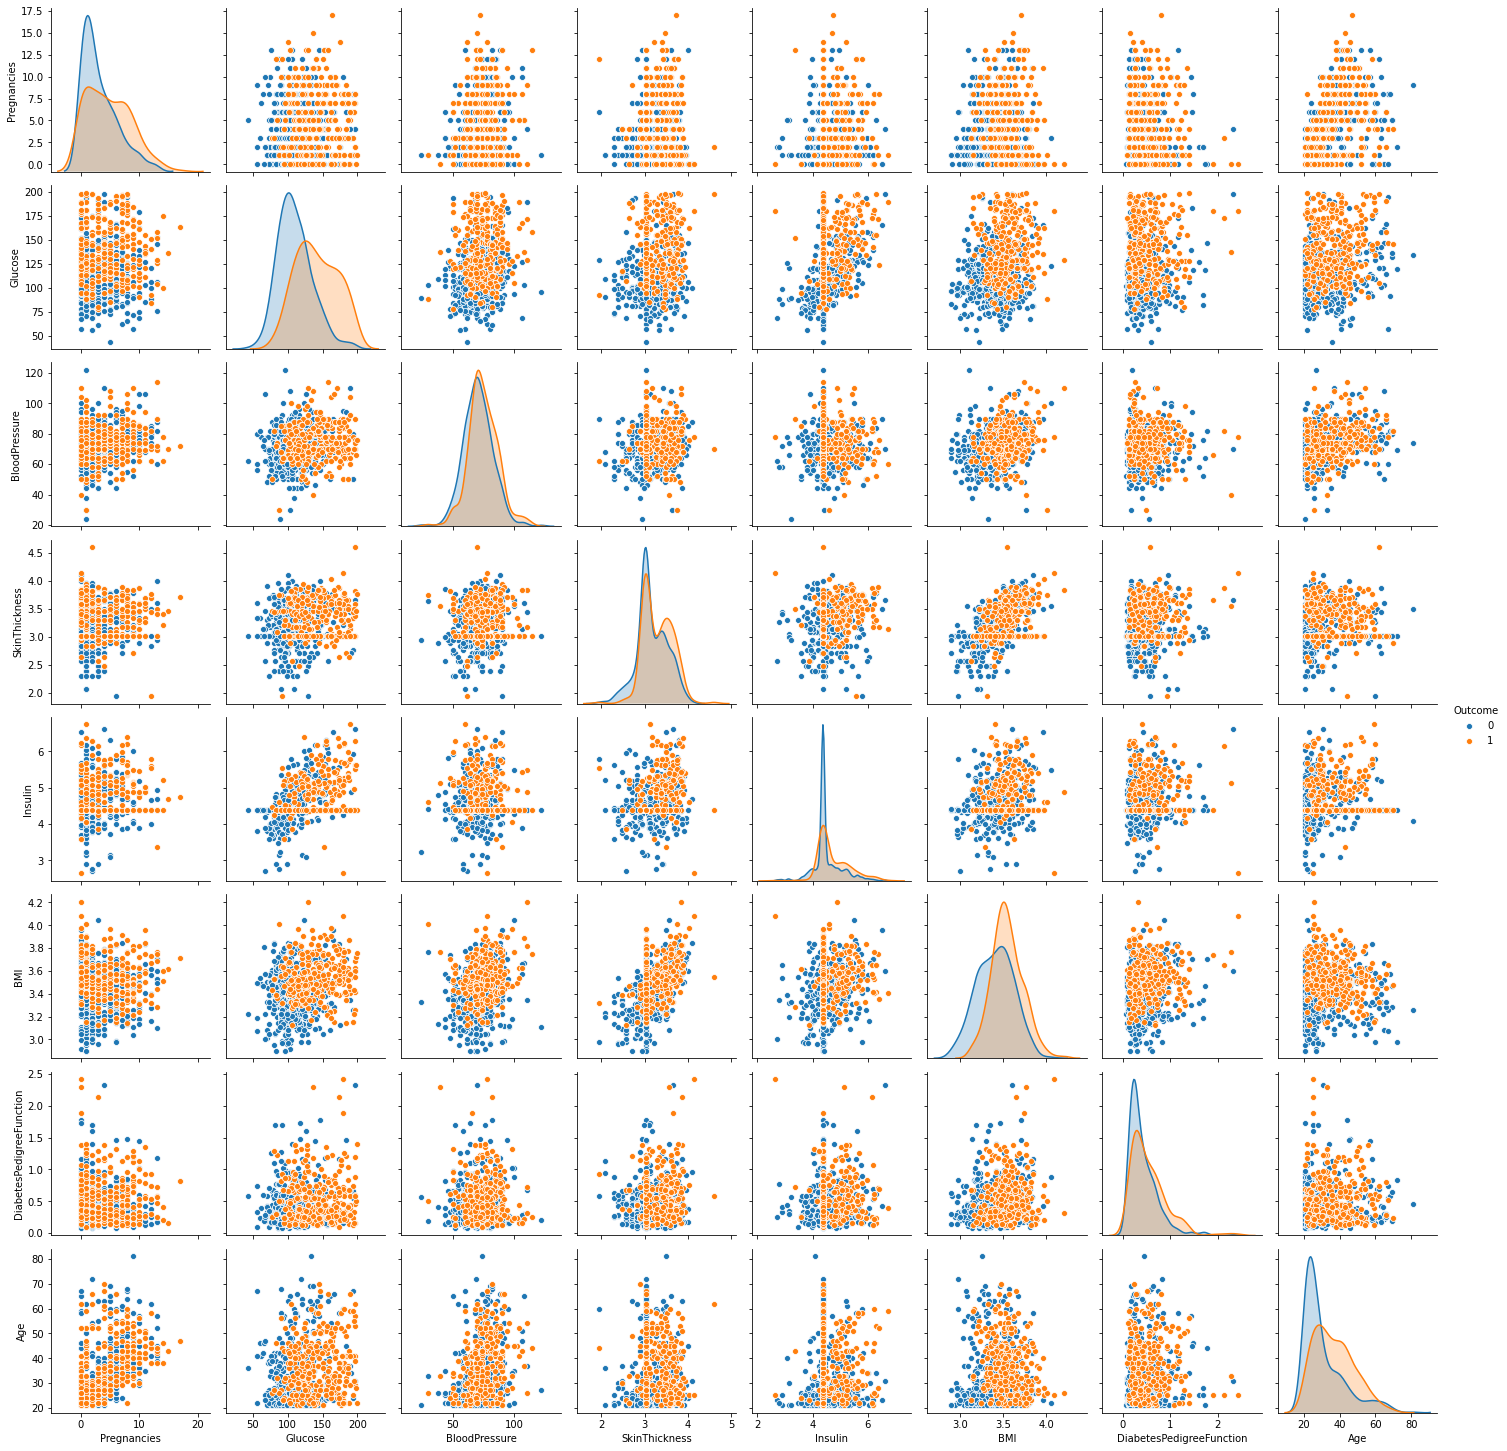

In [ ]:
#prepare pair plot
#sns.pairplot(df)
sns.pairplot(df, hue = 'Outcome')

NOTE : the above output shows

*   Orange dots are Diabetic & Blue dots are Non-Diabetic
*   Glucose is modelate positive correlated with Outcome
*   BloodPressure and Age are moderate positive
 correlated


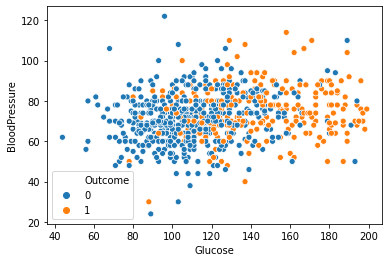

In [ ]:
#Scatter Plot of Glucose & BloodPressure
g =sns.scatterplot(x= "Glucose" ,y= "BloodPressure",
              hue="Outcome",
              data=df);

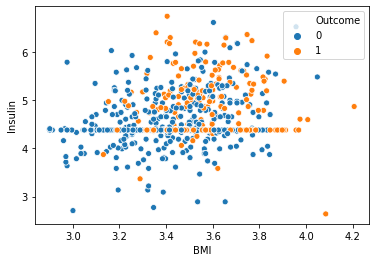

In [ ]:
# Scatter Plot of BMI & Insulin
B =sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue="Outcome",
              data=df);

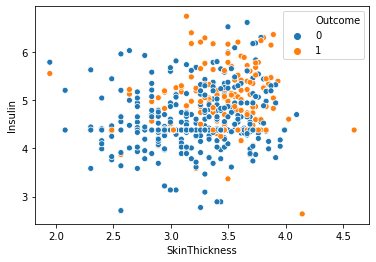

In [ ]:
# Scatter Plot of SkinThickness & Insulin
S =sns.scatterplot(x= "SkinThickness" ,y= "Insulin",
              hue="Outcome",
              data=df);

In [ ]:
# Coorelation Matrix
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.041923,0.012882,0.042696,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.161080,0.420000,0.237905,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.141724,0.029934,0.271812,0.000371,0.326740,0.162986
SkinThickness,0.041923,0.161080,0.141724,1.000000,0.244609,0.553606,0.126937,0.038566,0.183625
Insulin,0.012882,0.420000,0.029934,0.244609,1.000000,0.220525,0.142408,0.062000,0.211521
BMI,0.042696,0.237905,0.271812,0.553606,0.220525,1.000000,0.149000,0.039090,0.320871
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.126937,0.142408,0.149000,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.038566,0.062000,0.039090,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.183625,0.211521,0.320871,0.173844,0.238356,1.000000


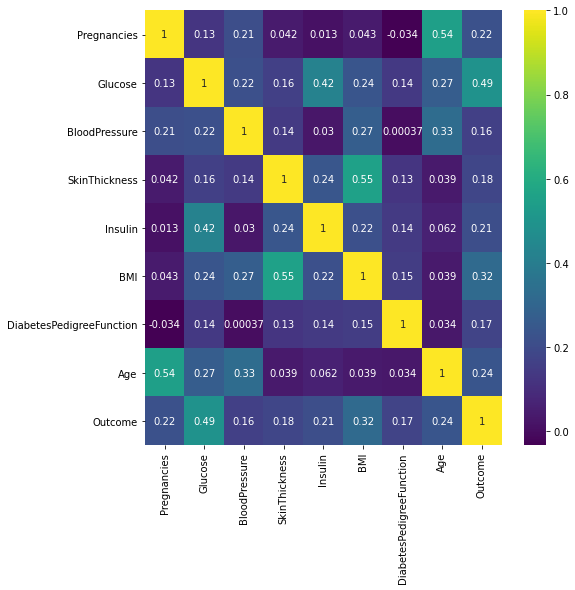

In [ ]:
# Create Coorelation Heatmap with correlation value
plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

NOTE : The above output shows Glucose is moderate positive correlated with Outcome


In [ ]:
# Here the target variable(i.e. Outcome) is binary(0 or 1)
# and all the feature variables are numeric
# Will perform Logistic Regression
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,3.555348,4.379517,3.514526,0.627,50,1
1,1,85.0,66.0,3.367296,4.379517,3.280911,0.351,31,0
2,8,183.0,64.0,3.022202,4.379517,3.148453,0.672,32,1
3,1,89.0,66.0,3.135494,4.543295,3.335770,0.167,21,0
4,0,137.0,40.0,3.555348,5.123964,3.763523,2.288,33,1


In [ ]:
#get the feature & target column from the dataset

x = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']]
y = df['Outcome']

NOTE :                                                   
the train-test procedure is not appropriate when the dataset available is small. The reason is that when the dataset is split into train and test sets, there will not be enough data in the training dataset for the model to learn an effective mapping of inputs to outputs. There will also not be enough data in the test set to effectively evaluate the model performance. 

If you have insufficient data, then a suitable alternate model evaluation procedure would be the k-fold cross-validation procedure.


In [ ]:
# We will be using k-fold cross validation
# Cross-validation is a resampling procedure used to 
# evaluate machine learning models on a limited data sample.

from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle=True)


In [ ]:
# split test and train dataset using k-fold
for train_index, test_index in kf.split(x,y):
    #print("Train:", train_index, "Test:",test_index)
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


Project Task: Week 3                                   
Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [ ]:
# Here target variable is categorical.So will use Classification Algorithm
# Logistic Rgression Used to estimate 
# discrete values (binary values like 0/1, yes/no, true/false ) based on given set
# of independent variable(s).

#Create Logistic Regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

[[93 16]
 [12 32]]


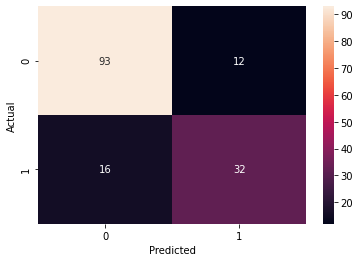

In [ ]:
# Model Evaluation using Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

cm = confusion_matrix(y_pred,y_test)
print(cm)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
# Logistic Regression Model Accuracy Score
print('Logistic Regression Model Accuracy: ',metrics.accuracy_score(y_test, y_pred))


Logistic Regression Model Accuracy:  0.8169934640522876


In [ ]:
#Applying Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier(max_depth=5)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)

In [ ]:
# Decision Tree Model Score
#model3.score(X_test,y_test)
# Model Accuracy, how often is the classifier correct?
print("Decision Tree Model Accuracy:",metrics.accuracy_score(y_test, y_pred))

Decision Tree Model Accuracy: 0.8104575163398693


In [ ]:
# Applying Random Forest
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(n_estimators=11)
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)

In [ ]:
# Random Forest Model Score
#model4.score(X_test,y_test)
print("Random Forest Model Accuracy:",metrics.accuracy_score(y_test, y_pred))

Random Forest Model Accuracy: 0.7777777777777778


In [ ]:
# Applying Support Vector Machine Classifier (SVM)

from sklearn.svm import SVC 

model5 = SVC(kernel='rbf',
           gamma='auto')
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)

In [ ]:
# SVM Model Score
model5.score(X_test,y_test)
print("SVM Model Accuracy:",metrics.accuracy_score(y_test, y_pred))

SVM Model Accuracy: 0.6797385620915033


In [ ]:
# Applying k-nearest neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)

In [ ]:
# KNN Model Score
#model2.score(X_test,y_test)
print("KNN Model Accuracy:",metrics.accuracy_score(y_test, y_pred))

KNN Model Accuracy: 0.7973856209150327


NOTE :
Comparison of different Model Accuracy Score :

Logistic Regression Model Accuracy:  0.8169934640522876  
Decision Tree Model Accuracy: 0.8104575163398693  
Random Forest Model Accuracy: 0.7777777777777778  
SVM Model Accuracy: 0.6797385620915033  
KNN Model Accuracy: 0.7973856209150327

The above output shows "Logistic Regression" and "Decision Tree" are giving better results than the other models.

Now we will try below Ensemble Learning : 
1. Boosting based Ensemble using XGBoost
2. Voting based Ensemble for Classification.
Voting is one of the most straightforward Ensemble learning techniques in which predictions from multiple models are combined. The method starts with creating two or more separate models with the same dataset. Then a Voting based Ensemble model can be used to wrap the previous models and aggregate the predictions of those models.

In [ ]:
# Try Boosting Based Ensemble
# Let's try XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# fit model into training data
model20 = XGBClassifier()
model20.fit(X_train,y_train)
y_pred=model20.predict(X_test)

print("XGBoost Model Accuracy:",metrics.accuracy_score(y_test, y_pred))

XGBoost Model Accuracy: 0.8300653594771242


In [ ]:
# Now Let's try Voting based Ensemble for Classification
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

seed = 7
num_trees = 70

kfold = model_selection.KFold(n_splits=5, random_state=seed)

# create the sub models
estimators = []

model11 = LogisticRegression()
estimators.append(('Logistic', model11))
model12 = DecisionTreeClassifier()
estimators.append(('DecisionTree', model12))
model13 = RandomForestClassifier()
estimators.append(('RandomForest', model13))
model14 = SVC()
estimators.append(('SVM', model14))
model15 = KNeighborsClassifier()
estimators.append(('KNN', model15))
#estimators
# create the ensemble model
ensemble = VotingClassifier(estimators)
#model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
#results = model_selection.cross_val_score(ensemble, x, y, cv=kfold)
ensemble.fit(X_train,y_train)
y_pred=ensemble.predict(X_test)
#model.score(x_test,y_test)
print("Ensemble Voting Based Model Accuracy:",metrics.accuracy_score(y_test, y_pred))

#print(results.mean())


Ensemble Voting Based Model Accuracy: 0.8496732026143791


**NOTE : After applying Ensemble we got the below**

XGBoost Model Accuracy: 0.8300653594771242  
Ensemble Voting Based Model Accuracy: 0.8496732026143791

**The above output shows Ensemble gives better model accuracy**

Project Task: Week 4

Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

NOTE :

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

In a Receiver Operating Characteristic (ROC) curve the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points. Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold.

In [ ]:
# Classification Report of Logistic Regression
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       500
           1       0.71      0.56      0.62       268

    accuracy                           0.76       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.76      0.76       768



AUC: 0.831


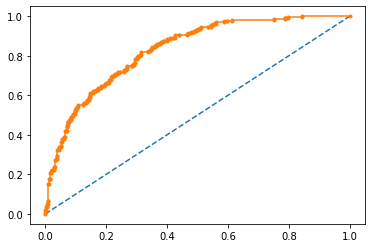

In [ ]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)
# for Logistic Regression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model.predict_proba(x)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [ ]:
# Classification Report of KNN
print(classification_report(y,model2.predict(x)))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       500
           1       0.70      0.68      0.69       268

    accuracy                           0.79       768
   macro avg       0.77      0.76      0.76       768
weighted avg       0.79      0.79      0.79       768



AUC: 0.858
True Positive Rate - [0.         0.0858209  0.29477612 0.5        0.67910448 0.82089552
 0.93283582 0.97014925 1.        ], False Positive Rate - [0.    0.002 0.026 0.076 0.156 0.248 0.394 0.628 1.   ] Thresholds - [2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]


Text(0, 0.5, 'True Positive Rate')

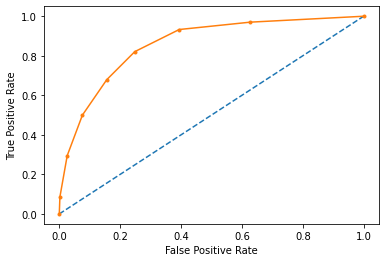

In [ ]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)
# for KNN Model

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model2.predict_proba(x)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [ ]:
# Classification Report of Decision Tree
print(classification_report(y,model3.predict(x)))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       500
           1       0.74      0.76      0.75       268

    accuracy                           0.82       768
   macro avg       0.80      0.81      0.81       768
weighted avg       0.82      0.82      0.82       768



AUC: 0.889
True Positive Rate - [0.         0.04850746 0.35447761 0.39552239 0.55597015 0.76119403
 0.76865672 0.8358209  0.86567164 0.90671642 0.94402985 0.95149254
 0.97014925 0.98134328 1.        ], False Positive Rate - [0.    0.006 0.026 0.028 0.06  0.146 0.15  0.202 0.236 0.322 0.384 0.406
 0.496 0.586 1.   ] Thresholds - [2.         1.         0.90410959 0.88888889 0.78846154 0.58333333
 0.33333333 0.32258065 0.31578947 0.27777778 0.27027027 0.16666667
 0.08695652 0.02857143 0.        ]


Text(0, 0.5, 'True Positive Rate')

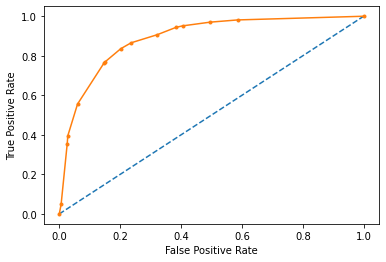

In [ ]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)
# for Decision Tree

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model3.predict_proba(x)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [ ]:
# Classification Report of Random Forest
print(classification_report(y,model4.predict(x)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       500
           1       0.93      0.91      0.92       268

    accuracy                           0.95       768
   macro avg       0.94      0.94      0.94       768
weighted avg       0.95      0.95      0.95       768



AUC: 0.970
True Positive Rate - [0.         0.17164179 0.37686567 0.60074627 0.72761194 0.85820896
 0.9141791  0.93656716 0.95149254 0.96268657 0.97014925 0.99253731
 1.        ], False Positive Rate - [0.    0.    0.002 0.012 0.024 0.028 0.038 0.054 0.102 0.182 0.308 0.514
 1.   ] Thresholds - [2.         1.         0.90909091 0.81818182 0.72727273 0.63636364
 0.54545455 0.45454545 0.36363636 0.27272727 0.18181818 0.09090909
 0.        ]


Text(0, 0.5, 'True Positive Rate')

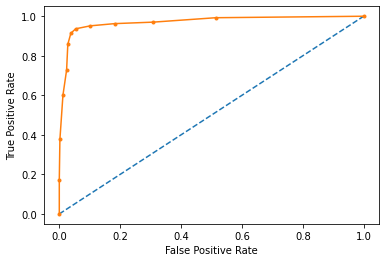

In [ ]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)
# for Random Forest

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model4.predict_proba(x)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Comparison of different AUC score as below :

Logistic Regression AUC: 0.805  
KNN AUC: 0.861  
Decision Tree AUC: 0.884  
Random Forest AUC: 0.974

**The above output shows "Random Forest" is giving better result than the other models.**                 
**Also f1-score of Random Forest is giving better result than the other models.**

NOTE : 
In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding.

The F1 Score is the 2*((precision*recall)/(precision+recall)). It is also called the F Score or the F Measure. Put another way, the F1 score conveys the balance between the precision and the recall.

Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. ... In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on.                                                    
The highest possible value of F1 is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero


ROC Curve NOTE : 

True Positive Rate (TPR) = TP / (TP + FN)

False Positive Rate (FPR) = FP / (FP + TN)


Precision Recall NOTE : 

PPV : Positive Predictive Value

TPR : True Positive Rate

precision = PPV = TP/(TP + FP)

recall = TPR = TP/(TP + FN)